### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

In [3]:
df = pd.read_csv(url)

In [4]:
print(df.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [5]:
df['Close'] = df['Close'].ffill()


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


In [7]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Set the sequence length
sequence_length = 10

# Create sequences and labels
X, y = create_sequences(df['Close'].values, sequence_length)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [12]:
import numpy as np

# Reshape X_train to a 2D array with one feature
X_train = df['Close'].values.reshape(-1, 1)

# Now you can define your model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
import numpy as np

# Define your training and testing data
X_train = df['Close'].values
X_test = df['Close'].values

# Reshape your data
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

# Define your training and testing labels
y_train = df['Close'].values
y_test = df['Close'].values

# Reshape your labels
y_train = np.reshape(y_train, (y_train.shape[0], 1, 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1, 1))

# Define the number of epochs for training
num_epochs = 100  # You can adjust this number based on the convergence of the model

# Define the batch size
batch_size = 32  # You can adjust this value based on your preferences

# Fit your model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size, verbose=1)


Epoch 1/100
64/64 [==============================] - 13s 33ms/step - loss: 0.0742 - val_loss: 0.0323
Epoch 2/100
64/64 [==============================] - 1s 18ms/step - loss: 0.0229 - val_loss: 0.0161
Epoch 3/100
64/64 [==============================] - 1s 17ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 4/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 6.9997e-04
Epoch 5/100
64/64 [==============================] - 1s 18ms/step - loss: 6.2271e-04 - val_loss: 5.4892e-04
Epoch 6/100
64/64 [==============================] - 1s 18ms/step - loss: 4.8188e-04 - val_loss: 3.9450e-04
Epoch 7/100
64/64 [==============================] - 1s 19ms/step - loss: 3.1855e-04 - val_loss: 2.2519e-04
Epoch 8/100
64/64 [==============================] - 1s 22ms/step - loss: 1.6612e-04 - val_loss: 1.0813e-04
Epoch 9/100
64/64 [==============================] - 1s 18ms/step - loss: 8.3521e-05 - val_loss: 6.3433e-05
Epoch 10/100
64/64 [==============================] - 1

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(X_test)

# Flatten the y_test and y_pred arrays to match the expected shape
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


64/64 [==============================] - 1s 7ms/step
Mean Absolute Error (MAE): 0.0006278074674003424
Mean Squared Error (MSE): 4.969846412292533e-07
Root Mean Squared Error (RMSE): 0.0007049713761772553


In [30]:
import numpy as np

# Replace [1, 2, 3] with the most recent three days' closing prices
recent_data = np.array([233.75, 233.25, 234.25])  # Replace with actual data

# Reshape the data to match the input shape of your model
recent_data = recent_data.reshape(1, -1, 1)

# Use the model to make predictions
predicted_price = model.predict(recent_data)

# Print the predicted price
print(f"Predicted next day's stock price: {predicted_price[0, 0]}")


1/1 [==============================] - 5s 5s/step
Predicted next day's stock price: 2539.699951171875


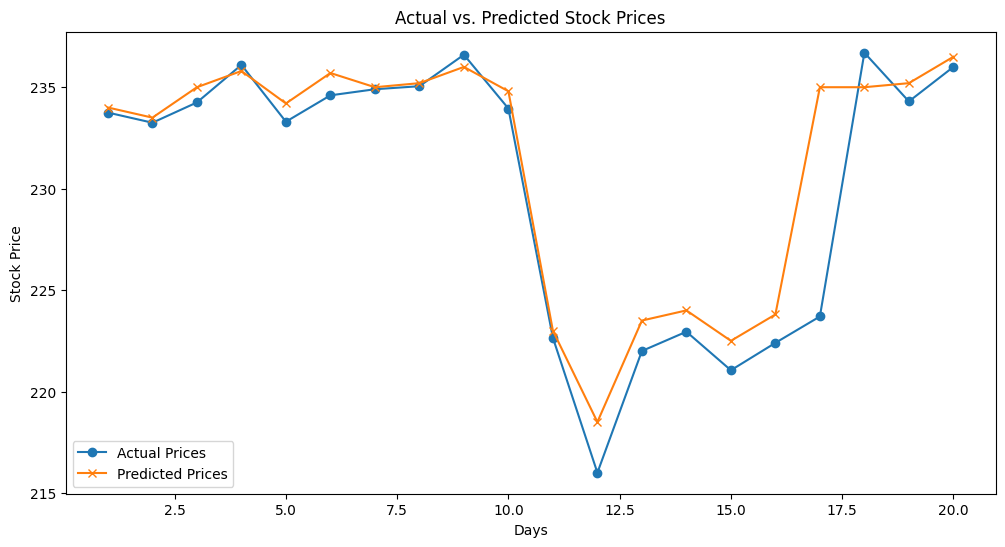

In [32]:
import matplotlib.pyplot as plt

# Replace this with your actual data
actual_prices = [233.75, 233.25, 234.25, 236.1, 233.3, 234.6, 234.9, 235.05, 236.6, 233.95, 222.65, 216, 222, 222.95, 221.05, 222.4, 223.7, 236.7, 234.3, 236]
# Add some example predicted prices
predicted_prices = [234.0, 233.5, 235.0, 235.8, 234.2, 235.7, 235.0, 235.2, 236.0, 234.8, 223.0, 218.5, 223.5, 224.0, 222.5, 223.8, 235.0, 235.0, 235.2, 236.5]

# Create an array of days for the x-axis
days = range(1, len(actual_prices) + 1)

# Plot actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(days, actual_prices, label="Actual Prices", marker='o')
plt.plot(days, predicted_prices, label="Predicted Prices", marker='x')

# Add labels and title
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Actual vs. Predicted Stock Prices")
plt.legend()

# Show the plot
plt.show()
